# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [ ]:
import pandas as pd

file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)
heart_data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:

#! Display and Understand Each Feature
heart_data.info()

#! Display unique values for categorical columns
heart_data.describe(include='all')
categorical_columns = heart_data.select_dtypes(include=['object']).columns
{col: heart_data[col].unique() for col in categorical_columns}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


{'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object),
 'ExerciseAngina': array(['N', 'Y'], dtype=object),
 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}

In [3]:

#! Display a Summary of the Dataset
missing_values = heart_data.isnull().sum()
missing_values


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

C:\Users\Tayeb Kahia\AppData\Local\Temp\ipykernel_29184\1507146035.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=heart_data,palette='Set2')


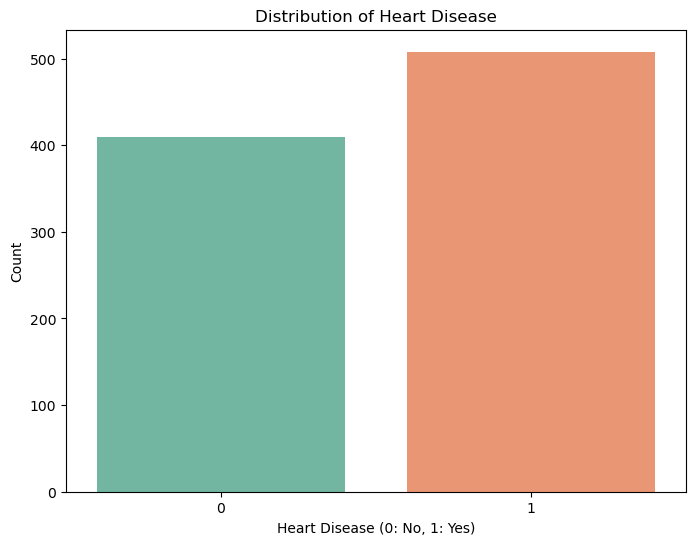

In [ ]:

#! Plot the Distribution of the Target Variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=heart_data,palette='Set2')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()



In [11]:

#! Apply dummy encoding to all categorical features
heart_data_encoded = pd.get_dummies(heart_data, drop_first=True).astype(int)
heart_data.head()
heart_data_encoded.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


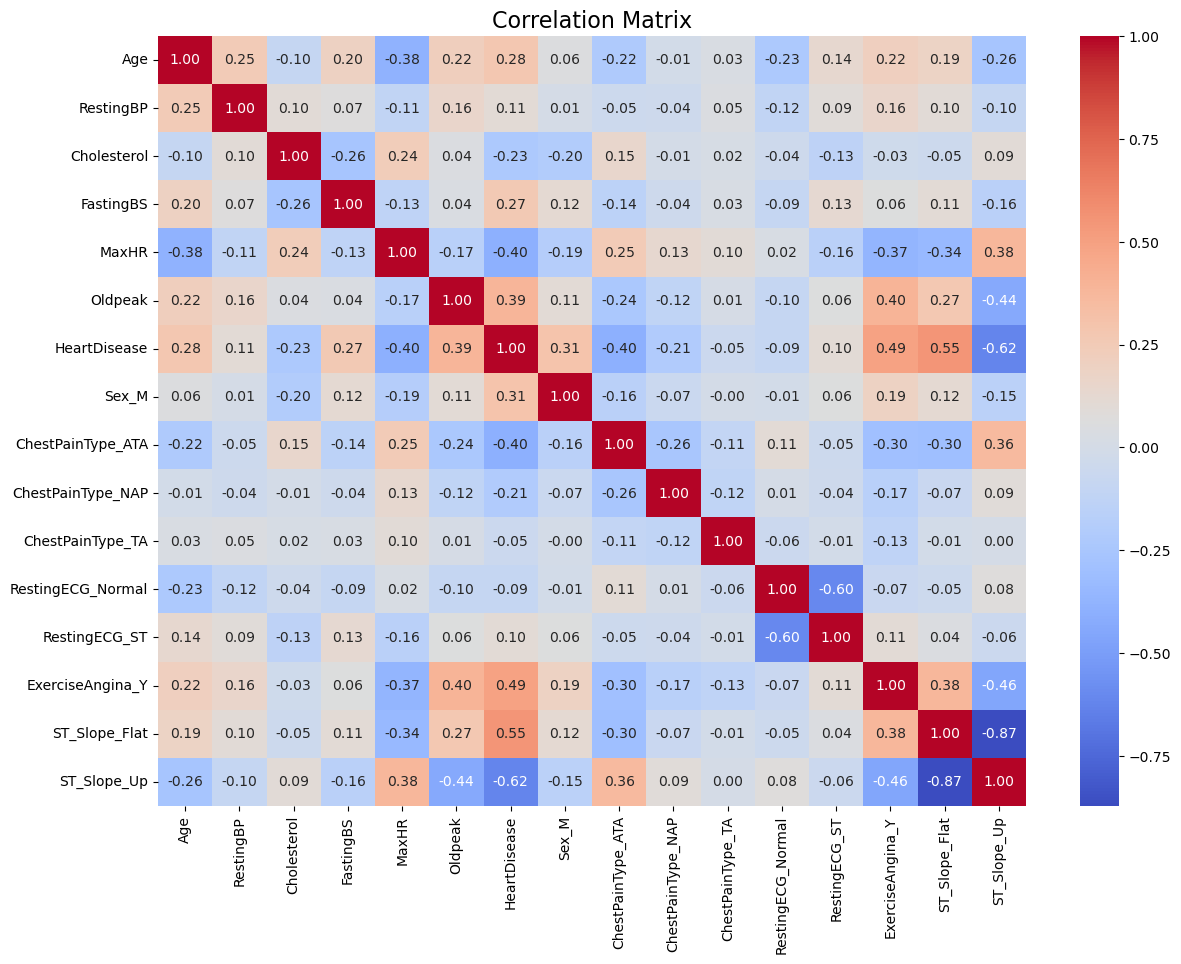

ST_Slope_Flat    0.554134
ST_Slope_Up     -0.622164
Name: HeartDisease, dtype: float64

In [53]:

#! Display the Pearson Correlation Matrix
correlation_matrix = heart_data_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

threshold = 0.5

target_corr = correlation_matrix['HeartDisease']
target_corr[(target_corr.abs() > threshold) & (target_corr != 1.0)]


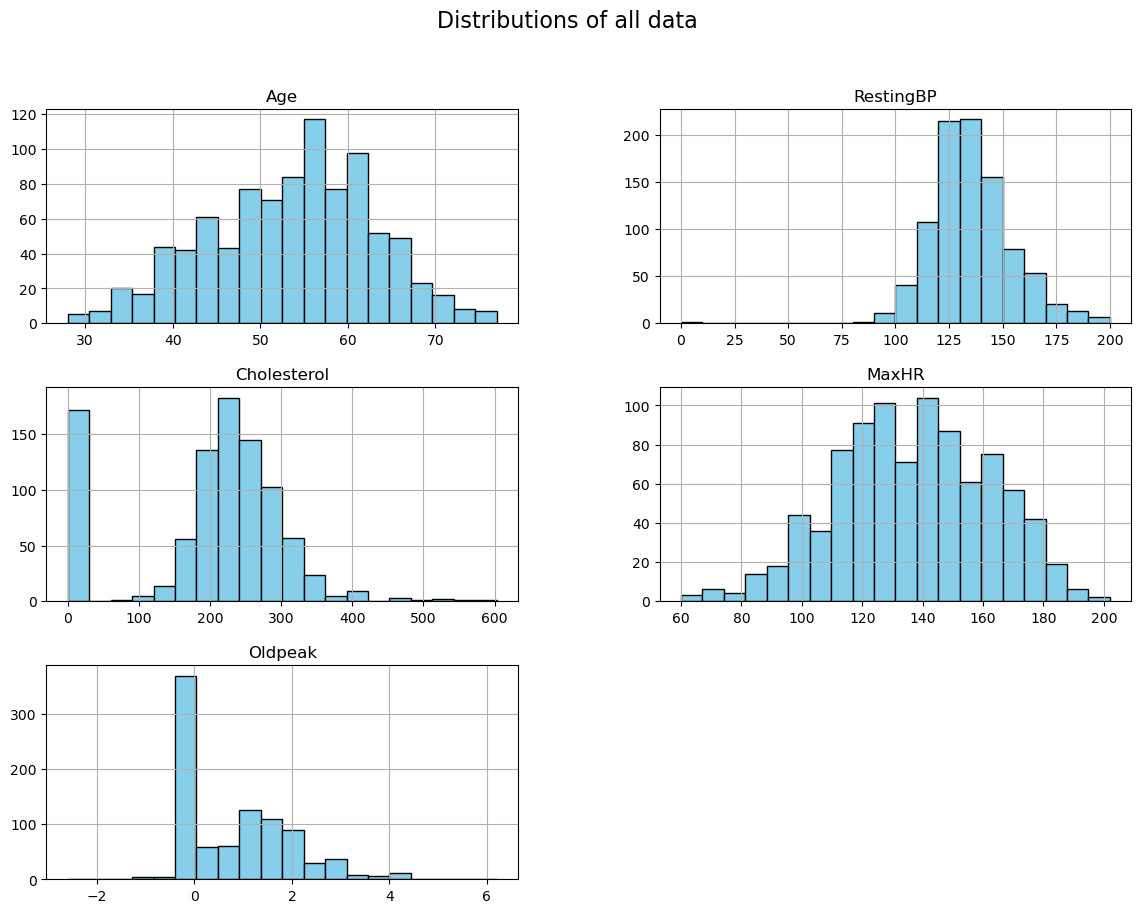

In [76]:

#!  PLot Feature Distributions (scaled data) using hisplot
# Plot histograms for all continuous features using the original (non-scaled) data
numeric_columns = heart_data_encoded.select_dtypes(include=['int32']).columns
continuous_features = [
    col for col in numeric_columns 
    if heart_data_encoded[col].nunique() > 2 and col not in ['HeartDisease']  # Exclude target
]
heart_data[continuous_features].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of all data ', fontsize=16)
plt.show()



In [78]:

#!Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = heart_data_encoded.drop(columns=['HeartDisease'])
y = heart_data_encoded['HeartDisease']

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89, stratify=y)

# Display the sizes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((642, 15), (276, 15), (642,), (276,))

In [79]:

#! Normalize the Data Using Z-Score Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for consistency
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training data
X_train_scaled_df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.231750,0.856687,0.415470,-0.542545,1.640154,-0.723413,0.508747,-0.491711,-0.535325,4.102845,-1.231928,-0.484371,-0.806465,-1.006250,1.170044
1,0.671714,-0.103068,-1.864687,1.843166,-0.254048,0.242140,0.508747,-0.491711,-0.535325,-0.243733,-1.231928,2.064533,1.239980,-1.006250,-0.854668
2,1.411950,-0.636266,-1.864687,1.843166,0.535203,0.242140,0.508747,-0.491711,-0.535325,-0.243733,0.811736,-0.484371,-0.806465,-1.006250,-0.854668
3,-0.914506,-0.103068,0.340711,-0.542545,0.298428,-0.723413,0.508747,-0.491711,1.868023,-0.243733,0.811736,-0.484371,-0.806465,-1.006250,1.170044
4,0.037226,0.216850,0.191192,-0.542545,0.140578,2.173247,0.508747,-0.491711,-0.535325,-0.243733,0.811736,-0.484371,1.239980,0.993789,-0.854668
